In [257]:
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [258]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [259]:
mult_nb = MultinomialNB().fit(X, y)
bern_nb = BernoulliNB().fit(X, y)
comp_nb = ComplementNB().fit(X, y)
cat_nb = CategoricalNB().fit(X, y)

In [260]:
y_pred_mult = mult_nb.predict(X)
print(confusion_matrix(y, y_pred_mult))
print('Accuracy= ', accuracy_score(y, y_pred_mult))
print('F1_score= ', f1_score(y, y_pred_mult))

[[163  49]
 [ 10 347]]
Accuracy=  0.8963093145869947
F1_score=  0.9216467463479415


MultinomialNB даёт точность в 89%, делая больше ошибок в первом классе, чем во втором, однако, он применим для данного датасета.

In [261]:
y_pred_bern = bern_nb.predict(X)
print(confusion_matrix(y, y_pred_bern))
print('Accuracy= ', accuracy_score(y, y_pred_bern))
print('F1_score= ', f1_score(y, y_pred_bern))

[[  0 212]
 [  0 357]]
Accuracy=  0.6274165202108963
F1_score=  0.7710583153347732


BernoulliNB даёт точность в 62%, но всегда определяет лишь второй класс, а первый класс относит также ко второму. Данный классификатор не применим к данному датасету.

In [262]:
y_pred_comp = comp_nb.predict(X)
print(confusion_matrix(y, y_pred_comp))
print('Accuracy= ', accuracy_score(y, y_pred_comp))
print('F1_score= ', f1_score(y, y_pred_comp))

[[163  49]
 [ 11 346]]
Accuracy=  0.8945518453427065
F1_score=  0.9202127659574469


ComplementNB похож по точности и кол-ву ошибок в каждом классе на MultinomialNB и также применим к данному датасету.

In [263]:
y_pred_cat = cat_nb.predict(X)
print(confusion_matrix(y, y_pred_cat))
print('Accuracy= ', accuracy_score(y, y_pred_cat))
print('F1_score= ', f1_score(y, y_pred_cat))

[[192  20]
 [  3 354]]
Accuracy=  0.9595782073813708
F1_score=  0.9685362517099864


CategoricalNB используется для классификации датасета в котором отсутствуют отрицательные значения, также значения должны иметь категориальное распределение. В данном случае, модель имеет точность ~96% и потому классификатор применим к данному датасету.

2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [264]:
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML3.6%20bayes/titanic.csv"
data = pd.read_csv(url, index_col=0)
X = data.drop("Survived", axis= 1).values
y = data["Survived"].values

In [265]:
gaus_nb = GaussianNB().fit(X, y)

In [266]:
y_pred_gaus = gaus_nb.predict(X)
print(confusion_matrix(y, y_pred_gaus))
print('Accuracy= ', accuracy_score(y, y_pred_gaus))
print('F1_score= ', f1_score(y, y_pred_gaus))

[[453  96]
 [ 94 248]]
Accuracy=  0.7867564534231201
F1_score=  0.7230320699708455


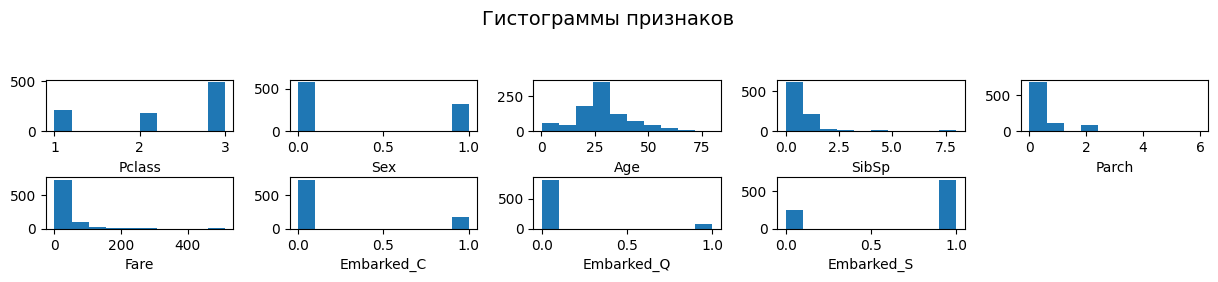

In [267]:
f = plt.figure(figsize=(15, 7))
for i in range(9):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])

    plt.xlabel(data.columns[i + 1])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

Большая часть признаков напоминает экспонинцеальное распределение, уберём те, что не являются таковыми.

In [268]:
data_exp = data.drop(["Pclass", "Sex", "Age", "Embarked_S"], axis= 1)
data_exp.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q
PassengerId,,,,,,
1,0,1,0,7.2500,0,0
2,1,1,0,71.2833,1,0
3,1,0,0,7.9250,0,0
4,1,1,0,53.1000,0,0
5,0,0,0,8.0500,0,0


In [269]:
X = data_exp.drop("Survived", axis= 1)

In [270]:
gaus_nb.fit(X, y)
y_pred_gaus = gaus_nb.predict(X)
print(confusion_matrix(y, y_pred_gaus))
print('Accuracy= ', accuracy_score(y, y_pred_gaus))
print('F1_score= ', f1_score(y, y_pred_gaus))

[[461  88]
 [215 127]]
Accuracy=  0.6599326599326599
F1_score=  0.45601436265709155


Точность модели стала хуже после удаления признаков, не соответствующих экспоненциальному распределению. Попробуем наоборот, оставить все, кроме тех, что имеют экспоненциальное распределение.

In [271]:
data_nonexp = data.drop(["Embarked_S", "Embarked_Q", "Embarked_C", "Fare", "Parch", "SibSp"], axis= 1)
data_nonexp.head()

,Survived,Pclass,Sex,Age
PassengerId,,,,
1,0,3,0,22.0
2,1,1,1,38.0
3,1,3,1,26.0
4,1,1,1,35.0
5,0,3,0,35.0


In [272]:
X = data_nonexp.drop("Survived", axis= 1)

In [273]:
gaus_nb.fit(X, y)
y_pred_gaus = gaus_nb.predict(X)
print(confusion_matrix(y, y_pred_gaus))
print('Accuracy= ', accuracy_score(y, y_pred_gaus))
print('F1_score= ', f1_score(y, y_pred_gaus))

[[465  84]
 [106 236]]
Accuracy=  0.7867564534231201
F1_score=  0.7129909365558913


Теперь точность модели очень близка к изначальной, когда использовались все данные. Попробуем другие модели наивного Байеса из первого задания.

In [274]:
X = data.drop("Survived", axis= 1).values

In [275]:
mult_nb = MultinomialNB().fit(X, y)
bern_nb = BernoulliNB().fit(X, y)
comp_nb = ComplementNB().fit(X, y)
cat_nb = CategoricalNB().fit(X, y)

In [276]:
y_pred_mult = mult_nb.predict(X)
print(confusion_matrix(y, y_pred_mult))
print('Accuracy= ', accuracy_score(y, y_pred_mult))
print('F1_score= ', f1_score(y, y_pred_mult))

[[455  94]
 [183 159]]
Accuracy=  0.6891133557800224
F1_score=  0.534453781512605


In [277]:
y_pred_bern = bern_nb.predict(X)
print(confusion_matrix(y, y_pred_bern))
print('Accuracy= ', accuracy_score(y, y_pred_bern))
print('F1_score= ', f1_score(y, y_pred_bern))

[[457  92]
 [100 242]]
Accuracy=  0.7845117845117845
F1_score=  0.7159763313609468


In [278]:
y_pred_comp = comp_nb.predict(X)
print(confusion_matrix(y, y_pred_comp))
print('Accuracy= ', accuracy_score(y, y_pred_comp))
print('F1_score= ', f1_score(y, y_pred_comp))

[[454  95]
 [178 164]]
Accuracy=  0.6936026936026936
F1_score=  0.5457570715474209


In [279]:
y_pred_cat = cat_nb.predict(X)
print(confusion_matrix(y, y_pred_cat))
print('Accuracy= ', accuracy_score(y, y_pred_cat))
print('F1_score= ', f1_score(y, y_pred_cat))

[[488  61]
 [104 238]]
Accuracy=  0.8148148148148148
F1_score=  0.7425897035881435


Лучше всех, в данном датасете, себя показал CategoricalNB.

3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [280]:
data = pd.read_csv("train.csv", index_col= 0)

X = data.drop(["Survived", "Name", "Ticket", "Cabin", "Embarked"], axis= 1)
X.Sex = X.Sex.apply(lambda x: 0 if x == "male" else 1)
X.fillna(0, inplace= True)
X = X.values
y = data["Survived"].values

In [281]:
gaus_nb = GaussianNB().fit(X, y)
mult_nb = MultinomialNB().fit(X, y)
bern_nb = BernoulliNB().fit(X, y)
comp_nb = ComplementNB().fit(X, y)
cat_nb = CategoricalNB().fit(X, y)

In [282]:
y_pred_gaus = gaus_nb.predict(X)
print(confusion_matrix(y, y_pred_gaus))
print('Accuracy= ', accuracy_score(y, y_pred_gaus))
print('F1_score= ', f1_score(y, y_pred_gaus))

[[465  84]
 [103 239]]
Accuracy=  0.7901234567901234
F1_score=  0.718796992481203


In [283]:
y_pred_mult = mult_nb.predict(X)
print(confusion_matrix(y, y_pred_mult))
print('Accuracy= ', accuracy_score(y, y_pred_mult))
print('F1_score= ', f1_score(y, y_pred_mult))

[[380 169]
 [157 185]]
Accuracy=  0.6341189674523008
F1_score=  0.5316091954022989


In [284]:
y_pred_bern = bern_nb.predict(X)
print(confusion_matrix(y, y_pred_bern))
print('Accuracy= ', accuracy_score(y, y_pred_bern))
print('F1_score= ', f1_score(y, y_pred_bern))

[[468  81]
 [109 233]]
Accuracy=  0.7867564534231201
F1_score=  0.7103658536585367


In [285]:
y_pred_comp = comp_nb.predict(X)
print(confusion_matrix(y, y_pred_comp))
print('Accuracy= ', accuracy_score(y, y_pred_comp))
print('F1_score= ', f1_score(y, y_pred_comp))

[[363 186]
 [152 190]]
Accuracy=  0.6206509539842873
F1_score=  0.5292479108635098


In [286]:
y_pred_cat = cat_nb.predict(X)
print(confusion_matrix(y, y_pred_cat))
print('Accuracy= ', accuracy_score(y, y_pred_cat))
print('F1_score= ', f1_score(y, y_pred_cat))

[[493  56]
 [106 236]]
Accuracy=  0.8181818181818182
F1_score=  0.7444794952681387


Дополнительные задания

1. Напишите универсальную функцию рисования произвольного количества гистограмм, которую можно применить к любому датасету.

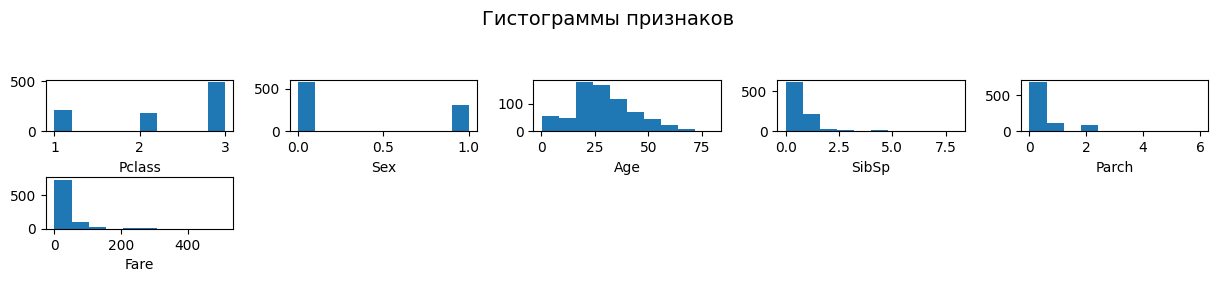

In [294]:
def hist(dataset):
  names = dataset.columns
  dataset = dataset.values

  f = plt.figure(figsize=(15, 7))

  for i in range(dataset.shape[1]):
    plt.subplot(6, 5, i + 1)
    plt.hist(dataset[:, i])
    plt.xlabel(names[i])

  f.subplots_adjust(hspace=0.9,wspace=0.3)
  plt.suptitle("Гистограммы признаков", fontsize=14)
  plt.show()

data = pd.read_csv("train.csv", index_col= 0)

datah = data.drop(["Survived", "Name", "Ticket", "Cabin", "Embarked"], axis= 1)
datah.Sex = datah.Sex.apply(lambda x: 0 if x == "male" else 1)
hist(datah)

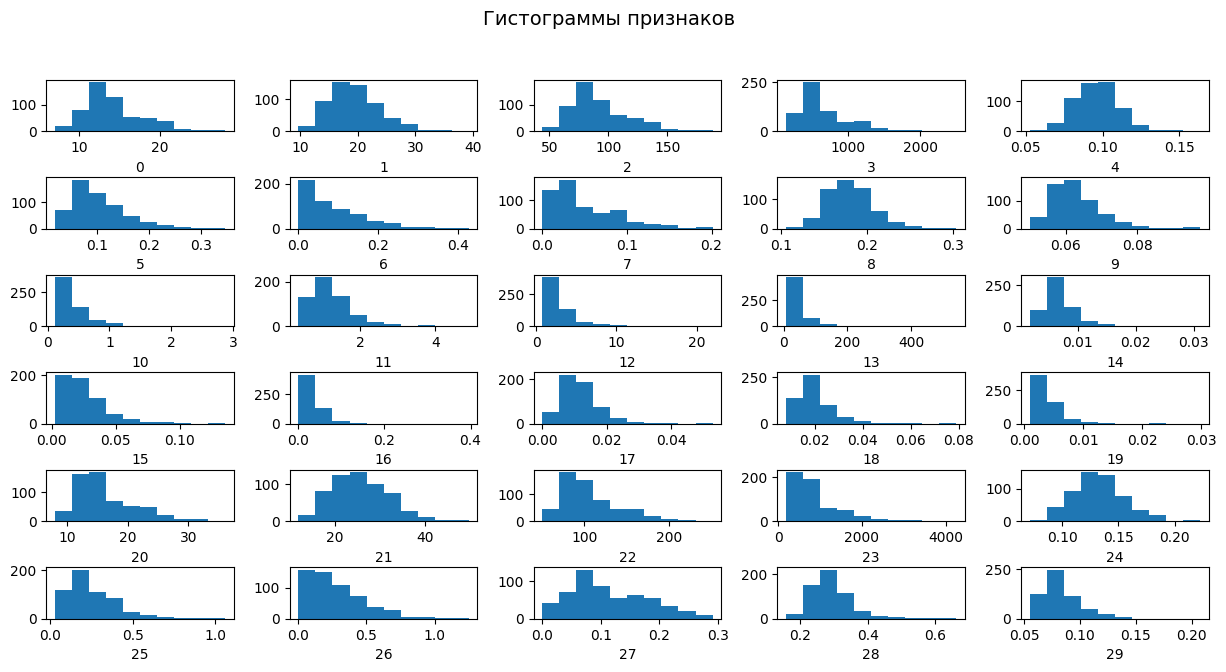

In [300]:
data = pd.DataFrame(datasets.load_breast_cancer().data)
hist(data)

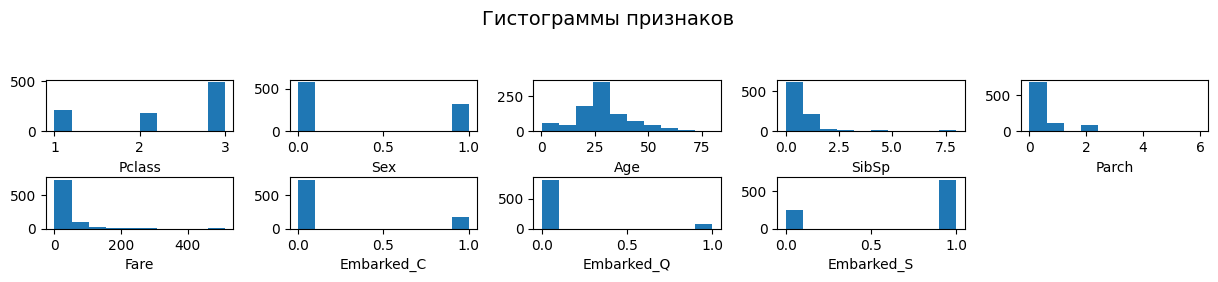

In [302]:
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML3.6%20bayes/titanic.csv"
data = pd.read_csv(url, index_col=0)
X = data.drop("Survived", axis= 1)
hist(X)